#### multiple linear regression
predicting the insurance charges by usingh a person's age, BMI and how many children he has

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import accuracy_score,mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D 


In [25]:
col_list = ["age", "bmi",'children','charges']
df = pd.read_csv("insurance.csv", usecols=col_list)
#Generate various summary statistics, excluding NaN values.
print(df.describe())


               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


          Coefficient
age        219.033468
bmi        284.247085
children   579.281725
           Actual     Predicted
578    9724.53000  15773.108836
610    8547.69130  14442.016417
569   45702.02235  18422.477731
1034  12950.07120  19490.269480
198    9644.25250  11521.191555


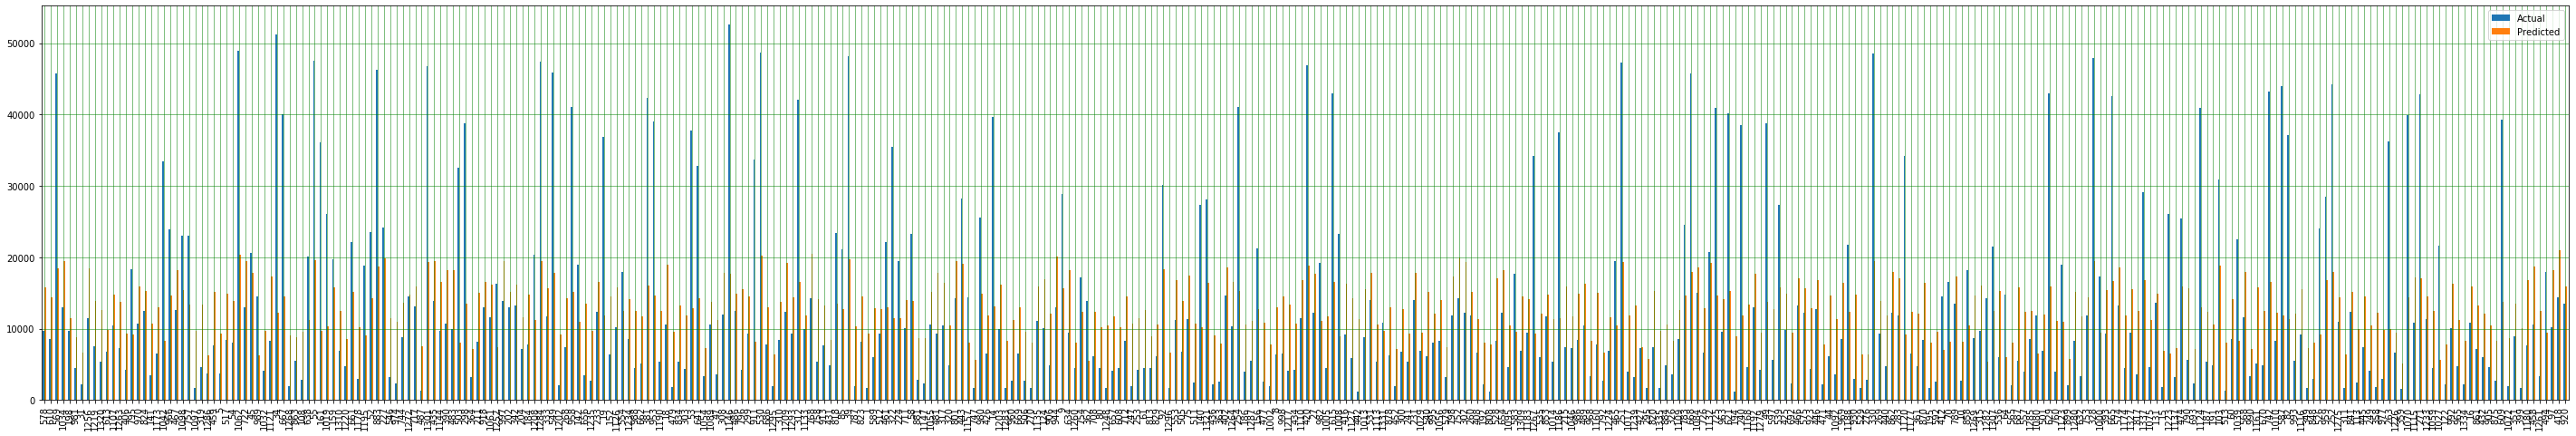

Intercept: 
 -4780.175188113402
Root Mean Square Error 
 11644.324934474926
R^2 Value: 
 0.1497412806492575


In [26]:
col_list = ["age", "bmi",'children','charges']
df = pd.read_csv("insurance.csv", usecols=col_list)
#selecting the columns except the result one
X = df.iloc[:,df.columns != 'charges']
#the insurance charges column
Y = df.iloc[:, 3]
#split test train 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state= 0)
model = linear_model.LinearRegression()
model.fit(X_train, Y_train)

#coefficient
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)

y_pred = model.predict(X_test)

#print out the actual value and predict value
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
print(df.head())

#visualization
df.plot(kind='bar',figsize=(50,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

#Root Mean Square Error and R square
rmsd = np.sqrt(mean_squared_error(Y_test, y_pred))      
r2_value = r2_score(Y_test, y_pred)                     

print("Intercept: \n", model.intercept_)
print("Root Mean Square Error \n", rmsd)
print("R^2 Value: \n", r2_value)

# plt.plot(X_test, Y_test, 'y*', label='Testing data')
# plt.plot(X_train, model.coef_ * X_train + model.intercept_, label='Fitted line')
# plt.legend()
# plt.show()